# Numeral I

In [15]:
# Cargar los datos
import pandas as pd
df = pd.read_csv("../Data/resultados_pruebas_saber_3_5_y_9.csv")
df

,año,codigo_dane,establecimiento_educativo,sector_educativo,comuna,grado,area,promedio,promedio_establecimiento,desviacion,nivel_superior,nivel_minimo,nivel_satisfactorio,nivel_avanzado
0,2017,105001000001,inst educ jose maria velaz,oficial,2,5,matemáticas,286.0,2.4,58.0,51,28,15,6
1,2017,105001000001,inst educ jose maria velaz,oficial,2,5,lenguaje,312.0,2.4,58.0,11,46,33,11
2,2017,105001000001,inst educ jose maria velaz,oficial,2,3,lenguaje,292.0,3.0,50.0,21,48,23,9
3,2017,105001000001,inst educ jose maria velaz,oficial,2,9,matemáticas,292.0,4.9,58.0,21,63,14,2
4,2017,105001000001,inst educ jose maria velaz,oficial,2,3,matemáticas,265.0,3.1,51.0,39,44,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2017,405001016946,col coop san antonio de prado (ac),contratacion,80,3,lenguaje,327.0,2.7,56.0,8,29,43,21
2146,2017,405001016946,col coop san antonio de prado (ac),contratacion,80,5,matemáticas,319.0,3.7,69.0,33,27,20,20
2147,2017,405001016946,col coop san antonio de prado (ac),contratacion,80,3,matemáticas,322.0,2.7,55.0,7,35,38,21
2148,2017,405001026500,col edificando vidas,privado,12,3,matemáticas,NaN,NaN,NaN,0,0,0,1


In [16]:
# Información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        2150 non-null   int64  
 1   codigo_dane                2150 non-null   int64  
 2   establecimiento_educativo  2150 non-null   object 
 3   sector_educativo           2150 non-null   object 
 4   comuna                     2150 non-null   int64  
 5   grado                      2150 non-null   int64  
 6   area                       2150 non-null   object 
 7   promedio                   2096 non-null   float64
 8   promedio_establecimiento   2096 non-null   float64
 9   desviacion                 2096 non-null   float64
 10  nivel_superior             2150 non-null   int64  
 11  nivel_minimo               2150 non-null   int64  
 12  nivel_satisfactorio        2150 non-null   int64  
 13  nivel_avanzado             2150 non-null   int64

In [17]:
# Ver valores únicos de una columna
df['año'].unique()

array([2017], dtype=int64)

In [18]:
# Verificar los establecimientos con nombres duplicados y sus códigos correspondientes
duplicados = df[df.duplicated(subset=['establecimiento_educativo'], keep=False)]

# Agrupar por 'establecimiento_educativo' y contar cuántos códigos distintos hay para cada nombre
duplicados_agrupados = duplicados.groupby('establecimiento_educativo')['codigo_dane'].nunique()

# Filtrar solo aquellos establecimientos con más de un código
establecimientos_con_multiple_codigo = duplicados_agrupados[duplicados_agrupados > 1]

# Mostrar los establecimientos con múltiples códigos
print("Establecimientos con más de un código:")
print(establecimientos_con_multiple_codigo)

# Ver los detalles completos de estos establecimientos
detalles_duplicados = duplicados[duplicados['establecimiento_educativo'].isin(establecimientos_con_multiple_codigo.index)]
print("\nDetalles de los establecimientos con códigos duplicados:")
print(detalles_duplicados[['codigo_dane', 'establecimiento_educativo']])

Establecimientos con más de un código:
establecimiento_educativo
col antares    2
Name: codigo_dane, dtype: int64

Detalles de los establecimientos con códigos duplicados:
       codigo_dane establecimiento_educativo
1942  305001021244               col antares
1943  305001021244               col antares
1944  305001021244               col antares
1945  305001021244               col antares
1946  305001021244               col antares
1947  305001021244               col antares
2046  305001024419               col antares
2047  305001024419               col antares
2048  305001024419               col antares
2049  305001024419               col antares
2050  305001024419               col antares
2051  305001024419               col antares


# Numeral II

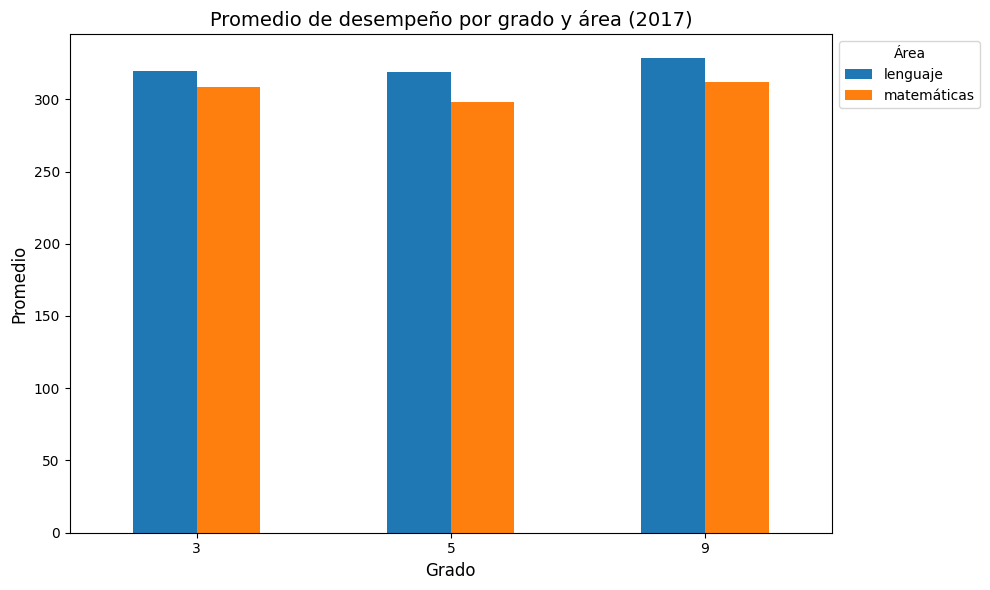

In [19]:
import matplotlib.pyplot as plt

# Agrupar por grado y calcular el promedio general para cada área
promedios_por_grado = df.groupby(['grado', 'area'])['promedio'].mean().unstack()

# Crear el gráfico
promedios_por_grado.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de desempeño por grado y área (2017)', fontsize=14)
plt.xlabel('Grado', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Área', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()